In [1]:
!pip install ultralytics
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import glob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.9.90
    Uninstalling nvidia-curand-cu12-10.3.9.

In [2]:
import torch

print("Torch Version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())
print("CUDA Device Count:", torch.cuda.device_count())

if torch.cuda.is_available():
    print("CUDA Device Name:", torch.cuda.get_device_name(0))
else:
    print("No GPU detected by PyTorch.")

Torch Version: 2.5.1+cu124
CUDA Available: True
CUDA Device Count: 1
CUDA Device Name: Tesla P100-PCIE-16GB


In [3]:
dataset_path = "/kaggle/input/idrid-yolo"

# Define splits
train_images_path = os.path.join(dataset_path, "images/train")
train_labels_path = os.path.join(dataset_path, "labels/train")
val_images_path = os.path.join(dataset_path, "images/val")
val_labels_path = os.path.join(dataset_path, "labels/val")

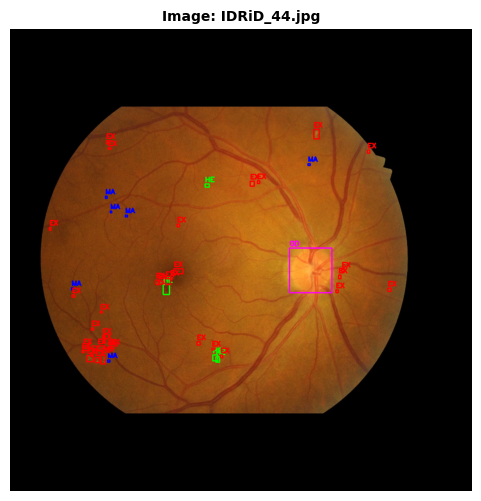

In [4]:
CLASS_NAMES = ["MA", "HE", "EX", "SE", "OD"]
CLASS_COLORS = {
    "MA": (0, 0, 255),   # Red
    "HE": (0, 255, 0),   # Green
    "EX": (255, 0, 0),   # Blue
    "SE": (255, 255, 0), # Cyan
    "OD": (255, 0, 255)  # Orange
}

def plot_sample_image(image_path, label_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get image filename
    image_name = os.path.basename(image_path)

    # Read YOLO annotation file
    with open(label_path, "r") as f:
        boxes = f.readlines()

    h, w, _ = image.shape

    # Draw bounding boxes with class labels
    for box in boxes:
        class_id, x, y, bw, bh = map(float, box.strip().split())
        class_id = int(class_id)
        class_name = CLASS_NAMES[class_id]
        color = CLASS_COLORS[class_name]

        x1 = int((x - bw / 2) * w)
        y1 = int((y - bh / 2) * h)
        x2 = int((x + bw / 2) * w)
        y2 = int((y + bh / 2) * h)

        # Draw bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        # Put class label
        cv2.putText(image, class_name, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Display image with title
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"Image: {image_name}", fontsize=10, fontweight="bold")
    plt.axis("off")
    plt.show()

# Show one sample image
sample_image_path = glob.glob(os.path.join(train_images_path, "*.jpg"))[15]
sample_label_path = os.path.join(train_labels_path, os.path.basename(sample_image_path).replace(".jpg", ".txt"))
plot_sample_image(sample_image_path, sample_label_path)

In [5]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 107MB/s]


In [6]:
model.train(
    data=os.path.join(dataset_path, "dataset.yaml"),
    epochs=100,
    imgsz=1024,
    batch=8,
    workers=2,
    device="auto"  # Automatically uses GPU if available
)

Ultralytics 8.3.124 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:auto (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/idrid-yolo/dataset.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=1024, save=True, save_period=-1, cache=False, device=auto, workers=2, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 755k/755k [00:00<00:00, 25.3MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 92.2MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 32.5±9.6 MB/s, size: 171.2 KB)


train: Scanning /kaggle/input/idrid-yolo/labels/train... 54 images, 0 backgrounds, 0 corrupt: 100%|██████████| 54/54 [00:00<00:00, 303.77it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/idrid-yolo/labels is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 47.5±7.6 MB/s, size: 173.9 KB)


val: Scanning /kaggle/input/idrid-yolo/labels/val... 27 images, 0 backgrounds, 0 corrupt: 100%|██████████| 27/27 [00:00<00:00, 291.64it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/idrid-yolo/labels is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.54G      2.782      4.641       1.48        841       1024: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         27       3194   5.86e-05   0.000103   3.53e-05   2.47e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      2/100      9.62G      2.804      4.528      1.368       1054       1024: 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         27       3194   0.000642   0.000998   0.000605   0.000267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      10.1G      2.723      3.947      1.155       1000       1024: 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         27       3194     0.0119     0.0846     0.0271     0.0154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.06G       2.73      3.242      1.159       1157       1024: 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         27       3194     0.0117      0.211      0.152     0.0768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.91G       2.62      2.862      1.161       1041       1024: 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         27       3194      0.985     0.0815      0.187      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.68G      2.682      2.716      1.136       1321       1024: 100%|██████████| 7/7 [00:02<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         27       3194      0.997      0.133        0.2      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.94G      2.568      2.553      1.118       1247       1024: 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         27       3194      0.985      0.141      0.204      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.71G      2.683      2.529      1.114        940       1024: 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         27       3194      0.979       0.17      0.215      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.39G      2.668      2.444      1.088        953       1024: 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         27       3194      0.985      0.184       0.24      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.86G      2.595      2.243      1.121       1264       1024: 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         27       3194       0.99      0.193      0.256      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.34G      2.565      2.425       1.11        743       1024: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         27       3194      0.965      0.195      0.258      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.34G      2.622      2.334      1.117        867       1024: 100%|██████████| 7/7 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         27       3194      0.964       0.18      0.259      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.34G      2.723      2.409       1.13        719       1024: 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         27       3194      0.857      0.182      0.281      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      9.14G      2.666      2.245       1.13        729       1024: 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         27       3194      0.857      0.182      0.281      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.74G      2.538      2.218      1.135       1329       1024: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all         27       3194      0.622      0.209      0.311      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.49G      2.624      2.179      1.148       1037       1024: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         27       3194      0.582      0.269      0.304       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       6.6G      2.491      2.057      1.149        782       1024: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         27       3194      0.547      0.318      0.316      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       6.6G      2.498      2.065      1.116        783       1024: 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         27       3194       0.56      0.342      0.337      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.61G      2.389      2.061      1.107       1205       1024: 100%|██████████| 7/7 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         27       3194      0.601      0.334      0.356      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.61G      2.403      2.105      1.103       1052       1024: 100%|██████████| 7/7 [00:01<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         27       3194      0.433      0.329      0.367      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.61G      2.436      2.066      1.075       1737       1024: 100%|██████████| 7/7 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         27       3194      0.407       0.33      0.367      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.61G      2.373      2.018      1.117        850       1024: 100%|██████████| 7/7 [00:01<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         27       3194      0.407       0.33      0.367      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.61G      2.431      1.931      1.102        872       1024: 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         27       3194      0.479      0.356      0.379      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.61G      2.367      1.924      1.068        311       1024: 100%|██████████| 7/7 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         27       3194      0.456      0.375      0.382      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      10.2G      2.484      1.904      1.085        583       1024: 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         27       3194      0.454      0.378      0.383      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.92G      2.403       1.93      1.079        922       1024: 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         27       3194      0.495      0.388      0.388      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.18G      2.358      1.926      1.106        605       1024: 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         27       3194       0.48      0.411      0.393      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.47G      2.394      1.963      1.102        752       1024: 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         27       3194      0.467      0.412      0.386      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      9.66G      2.411       1.86      1.063       1556       1024: 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         27       3194      0.478      0.382      0.384      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.21G      2.414      1.879      1.063        979       1024: 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         27       3194      0.478      0.382      0.384      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      11.9G      2.357      1.863      1.066       1028       1024: 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         27       3194      0.484      0.408      0.398      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.56G      2.295      1.791      1.076       1448       1024: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         27       3194      0.477      0.435      0.407      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.52G      2.332      1.756      1.081        870       1024: 100%|██████████| 7/7 [00:01<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         27       3194      0.505      0.432       0.42      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.11G      2.327      1.766      1.082        916       1024: 100%|██████████| 7/7 [00:01<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         27       3194      0.522      0.455      0.429      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.77G      2.269      1.792      1.054       1759       1024: 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         27       3194      0.518       0.45      0.422      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       8.5G      2.317      1.797      1.065        427       1024: 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         27       3194      0.524      0.445      0.422      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.05G      2.372      1.817      1.062        636       1024: 100%|██████████| 7/7 [00:02<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         27       3194      0.507      0.447      0.417      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.05G      2.242       1.77      1.023       1638       1024: 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         27       3194      0.507      0.447      0.417      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      9.18G      2.284      1.785      1.057        593       1024: 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         27       3194      0.494      0.447      0.424      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.05G      2.323      1.725      1.052        892       1024: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         27       3194      0.486       0.45      0.426      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.11G      2.227      1.702      1.055        768       1024: 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         27       3194      0.491      0.451      0.427      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.11G      2.232      1.749      1.046       1248       1024: 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         27       3194       0.48      0.456      0.426       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.11G      2.209      1.735      1.058        762       1024: 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all         27       3194      0.516      0.429      0.422      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.11G      2.257      1.748      1.066        529       1024: 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         27       3194      0.524      0.435      0.429      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.11G      2.276      1.737      1.059        757       1024: 100%|██████████| 7/7 [00:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         27       3194      0.517      0.444      0.426      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.11G      2.262      1.707      1.047       1101       1024: 100%|██████████| 7/7 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         27       3194      0.517      0.444      0.426      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.11G      2.304      1.707      1.052        695       1024: 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         27       3194       0.51      0.448      0.428      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.66G      2.298      1.701      1.052       1096       1024: 100%|██████████| 7/7 [00:02<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         27       3194      0.512      0.436      0.427      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      10.4G      2.304      1.703      1.041        845       1024: 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         27       3194      0.507      0.436      0.432      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.41G      2.251      1.607      1.036       1206       1024: 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         27       3194      0.507      0.424      0.432       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.96G       2.25      1.631      1.064        867       1024: 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         27       3194        0.5      0.441      0.426      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100        10G      2.209       1.56      1.021       1214       1024: 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         27       3194      0.486      0.441      0.421      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       6.9G      2.183      1.614      1.036        662       1024: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         27       3194      0.465      0.448      0.416      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.71G      2.269       1.62      1.052       1069       1024: 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         27       3194      0.465      0.448      0.416      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.67G      2.251      1.592      1.036       1213       1024: 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         27       3194      0.474      0.452      0.424      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      11.2G      2.212      1.669      1.063        379       1024: 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         27       3194      0.479      0.451      0.425      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.64G      2.206      1.607      1.029       1179       1024: 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         27       3194      0.494      0.459       0.43      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.64G      2.215       1.57      1.037       1073       1024: 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         27       3194      0.478      0.469      0.435      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.64G      2.183      1.622      1.047       1103       1024: 100%|██████████| 7/7 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         27       3194      0.486      0.473       0.44      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.64G      2.206      1.567      1.033       1946       1024: 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         27       3194      0.491      0.477      0.444      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.64G      2.193      1.643      1.031        485       1024: 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         27       3194      0.503      0.472      0.443      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.64G      2.184      1.577       1.02       1014       1024: 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         27       3194      0.503      0.472      0.443      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.64G      2.204      1.563      1.024        801       1024: 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         27       3194      0.501      0.475      0.443      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.64G      2.157      1.595      1.027       1217       1024: 100%|██████████| 7/7 [00:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         27       3194      0.503       0.47      0.446      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.64G      2.196      1.542      1.047       1712       1024: 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         27       3194      0.525      0.462      0.453      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.64G      2.195      1.521      1.032       1287       1024: 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         27       3194      0.524      0.477      0.458      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.64G      2.243      1.552       1.04        989       1024: 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         27       3194      0.513      0.485      0.462       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.64G      2.175      1.499       1.05       1306       1024: 100%|██████████| 7/7 [00:01<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         27       3194      0.506      0.477      0.465      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.64G      2.218       1.57      1.064       1608       1024: 100%|██████████| 7/7 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         27       3194      0.527      0.479      0.465      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.64G      2.145      1.525      1.029        818       1024: 100%|██████████| 7/7 [00:01<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         27       3194      0.527      0.479      0.465      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.64G      2.133      1.544      1.017        776       1024: 100%|██████████| 7/7 [00:01<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         27       3194      0.524      0.476      0.451      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.64G       2.13      1.491      1.011        707       1024: 100%|██████████| 7/7 [00:01<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         27       3194      0.517      0.476      0.449      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.64G      2.093      1.538      1.013        876       1024: 100%|██████████| 7/7 [00:01<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         27       3194      0.508      0.487      0.449      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.64G       2.09      1.525      1.003       1484       1024: 100%|██████████| 7/7 [00:01<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         27       3194      0.534      0.482      0.451      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.64G      2.144      1.494      1.013       1310       1024: 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         27       3194      0.543      0.486      0.454       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.64G      2.141      1.547      1.051        577       1024: 100%|██████████| 7/7 [00:01<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         27       3194      0.554      0.479      0.465      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.64G      2.129      1.513      1.028       1356       1024: 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         27       3194      0.546      0.473      0.467      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.64G       2.07      1.487      1.019        778       1024: 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         27       3194      0.546      0.473      0.467      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.64G      2.178      1.478      1.019        758       1024: 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         27       3194      0.569      0.472      0.469      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.64G      2.096      1.504      1.023        901       1024: 100%|██████████| 7/7 [00:01<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         27       3194      0.581      0.469      0.468      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.64G      2.074      1.469      1.012        435       1024: 100%|██████████| 7/7 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         27       3194      0.577      0.465      0.471      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.64G      2.102       1.45      1.027       1191       1024: 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         27       3194      0.582      0.466      0.468      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.64G      2.074       1.48      1.016        647       1024: 100%|██████████| 7/7 [00:01<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         27       3194      0.572      0.452       0.46      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.64G      2.088      1.433      1.012        760       1024: 100%|██████████| 7/7 [00:01<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         27       3194      0.555      0.455      0.458      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.64G      2.131      1.422      1.011       1474       1024: 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         27       3194      0.531       0.46      0.456      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.64G      2.193      1.488      1.029       1015       1024: 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         27       3194      0.531       0.46      0.456      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.64G      2.121      1.442      1.011        866       1024: 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         27       3194      0.494      0.497      0.455      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.64G      2.072      1.442      1.016       1116       1024: 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         27       3194      0.504        0.5      0.462       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.64G      2.096      1.427      1.024        813       1024: 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         27       3194      0.499        0.5      0.466       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.64G      2.085      1.435      1.007        545       1024: 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         27       3194      0.499      0.491      0.468      0.293


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.64G      2.068      1.494      1.009        629       1024: 100%|██████████| 7/7 [00:02<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         27       3194      0.493      0.495       0.47      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.64G      2.086      1.487      1.033        786       1024: 100%|██████████| 7/7 [00:01<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         27       3194      0.572      0.452      0.467      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.64G      2.077       1.51       1.02        454       1024: 100%|██████████| 7/7 [00:01<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         27       3194      0.571      0.459      0.468      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.64G      2.046      1.423     0.9992        758       1024: 100%|██████████| 7/7 [00:01<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         27       3194      0.571      0.459      0.468      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.64G      2.056      1.442      1.007        756       1024: 100%|██████████| 7/7 [00:01<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         27       3194       0.58       0.46      0.469      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.64G      2.051      1.443      1.008        525       1024: 100%|██████████| 7/7 [00:01<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         27       3194      0.571      0.459      0.468      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.64G       2.05      1.452      1.026        634       1024: 100%|██████████| 7/7 [00:01<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         27       3194      0.559       0.47      0.471      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.64G      2.034      1.445       1.01        388       1024: 100%|██████████| 7/7 [00:01<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         27       3194      0.565      0.465      0.471      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.64G      2.053      1.407      1.013        786       1024: 100%|██████████| 7/7 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         27       3194      0.565       0.46      0.469      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.64G      2.076      1.442      1.009        746       1024: 100%|██████████| 7/7 [00:01<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         27       3194      0.566      0.459      0.465      0.293



100 epochs completed in 0.084 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.124 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:auto (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]


                   all         27       3194      0.561      0.466       0.47      0.293
                    MA         27        662      0.483     0.0888      0.165     0.0562
                    HE         27        526      0.409      0.388      0.339      0.125
                    EX         27       1941       0.45      0.327      0.308       0.12
                    SE         14         38      0.495      0.526      0.544      0.271
                    OD         27         27      0.969          1      0.995      0.892


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.4ms preprocess, 5.0ms inference, 0.0ms loss, 9.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c3f4b791410>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [7]:
from ultralytics import YOLO

models = YOLO("/kaggle/working/runs/detect/train/weights/best.pt") 

results = models("/kaggle/input/idrid-yolo/images/train/IDRiD_01.jpg", save=True)


image 1/1 /kaggle/input/idrid-yolo/images/train/IDRiD_01.jpg: 1024x1024 2 MAs, 7 HEs, 38 EXs, 1 OD, 7.4ms
Speed: 3.7ms preprocess, 7.4ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict



image 1/1 /kaggle/input/idrid-yolo/images/train/IDRiD_01.jpg: 1024x1024 2 MAs, 7 HEs, 38 EXs, 1 OD, 6.3ms
Speed: 3.4ms preprocess, 6.3ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict2


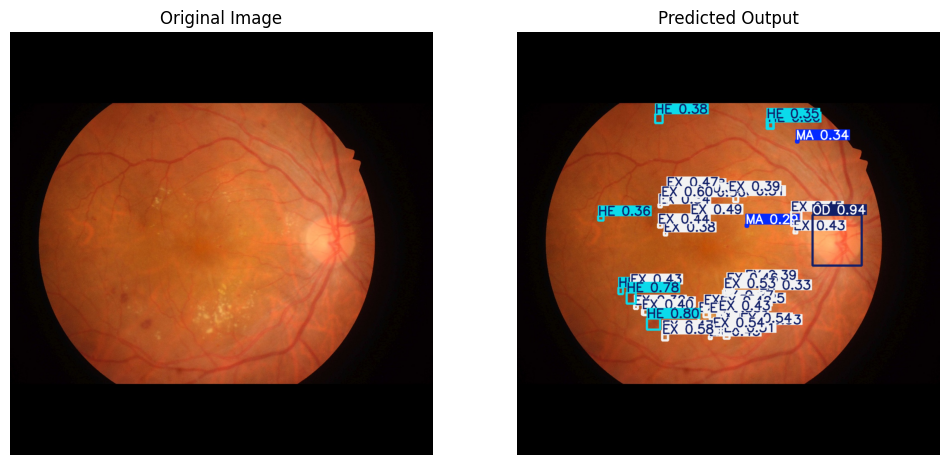

In [8]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

# Load YOLOv8 model
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

# Image path
image_path = "/kaggle/input/idrid-yolo/images/train/IDRiD_01.jpg"

# Run inference (prediction)
results = model(image_path, save=True)

# Load the original image
original_image = Image.open(image_path)

# Get the predicted image as a NumPy array (with bounding boxes)
predicted_img = results[0].plot()

# Convert BGR to RGB (Matplotlib expects RGB format)
predicted_img = cv2.cvtColor(predicted_img, cv2.COLOR_BGR2RGB)

# Display the original and predicted images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.axis("off")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(predicted_img)  # Now correctly formatted in RGB
plt.axis("off")
plt.title("Predicted Output")

plt.show()